# DSA3101 Lecture 1 Hands On Activity: Glassdoor Data Science Jobs Data Cleaning and Initial Exploration

## Background

This dataset was scraped from [Glassdoor.com](https://www.glassdoor.sg/index.htm?countryRedirect=true), one of the world’s largest job and career sites. It contains data science-related job postings, including salary estimates, job roles, locations, company ratings, and other metadata that can be useful for job market analysis.

Raw data often contains missing values, typos, inconsistent formatting, or irrelevant columns. Cleaning your data improves the quality of analysis and modeling.

## 🎯 Objectives
In this activity, you will:

### Perform data cleaning

- Handle missing or inconsistent values
- Detect and remove duplicate rows
- Parse and convert salary information
- Standardise categorical fields (e.g., job titles, seniority)

### Explore the cleaned data to answer key questions:

Q1: What is the relationship between company rating and the average salary offered?

Q2: Which job position has the highest expected average salary?

Q3: What are the most commonly required technical skills for data science roles (e.g., Python, SQL, AWS)?

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from itables import show

## Load and Inspect the Data

In [ ]:
# Load the uncleaned dataset
df = pd.read_csv("Uncleaned_DS_jobs1.csv")

In [ ]:
# Print the number of rows and columns in the DataFrame
print(df.shape) 

(672, 15)


We can inspect the column names and types with the `info()` method.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


The column with job descriptions is quite long, so we remove it before displaying.

In [ ]:
col_ids = list(range(0, 14))
col_ids.pop(3) #remove column 3 index, Job Description
show(df.iloc[:, col_ids]) #integer location, select columns/rows by index

Loading ITables v2.4.4 from the internet... (need help?)


Alternatively, we can display the first 5 rows of the DataFrame to get a quick look at the data by using df.head()

In [ ]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


We drop the 'index' column because it is likely a duplicate of the DataFrame's actual index and adds no useful information,

In [ ]:
df.drop(columns='index', inplace=True)
print(df.shape) 

(672, 14)


#### Generate Summary Statistics for Numerical Columns
(Includes mean, standard deviation, min, max, quartiles, etc.)

In [ ]:
df.describe()

,Rating,Founded
count,672.000000,672.000000
mean,3.518601,1635.529762
std,1.410329,756.746640
min,-1.000000,-1.000000
25%,3.300000,1917.750000
50%,3.800000,1995.000000
75%,4.300000,2009.000000
max,5.000000,2019.000000


## Identify and Remove Duplicated Rows

In [ ]:
duplicates = df.duplicated(keep=False) # Check for duplicate rows excluding the index
df[duplicates] # View duplicate rows (if any)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
131,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio\n4.9,"Lehi, UT","Lehi, UT",201 to 500 employees,2011,Company - Private,Lending,Finance,$50 to $100 million (USD),-1
134,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
135,Machine Learning Engineer,$90K-$109K (Glassdoor est.),Role Description\nTriplebyte screens and evalu...,3.2,Triplebyte\n3.2,Remote,"San Francisco, CA",51 to 200 employees,2015,Company - Private,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,-1
136,Senior Data Engineer,$90K-$109K (Glassdoor est.),Lendio is looking to fill a position for a Sen...,4.9,Lendio\n4.9,"Lehi, UT","Lehi, UT",201 to 500 employees,2011,Company - Private,Lending,Finance,$50 to $100 million (USD),-1
357,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
358,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
359,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
360,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
361,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1
362,Data Scientist,$122K-$146K (Glassdoor est.),Job Overview: The Data Scientist is a key memb...,-1.0,Hatch Data Inc,"San Francisco, CA",-1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
duplicates.sum() #Count of how many duplicated rows

np.int64(18)

We keep the first occurrence of each duplicate row and remove all subsequent duplicates

In [ ]:
df = df.drop_duplicates(keep='first')
print(df.shape) 

(659, 14)


### Summary of findings so far:

1. -1 values in columns `Rating` and `Founded`. Does this refer to missing values? What's the difference between -1 and "Unknown"?
2. 13 duplicate rows removed.
3. Company name includes rating, which is already in a separate column.

##  Fixing Column Names

The following command performs the following operations:

1. Removes whitespace at the beginning and end.
2. Converts all column names to lowercase
3. Replaces spaces to underscores.

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')


## Handling Missing Values

The following command tabulates the number of Nan values in the dataframe, by column.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

job_title            0
salary_estimate      0
job_description      0
rating               0
company_name         0
location             0
headquarters         0
size                 0
founded              0
type_of_ownership    0
industry             0
sector               0
revenue              0
competitors          0
dtype: int64

There are no Nans. Our missing values are represented as -1 in this case. Let us replace the -1s with None or NA.

In [ ]:
df2 = df.replace('-1', None) # for text
df2.replace(-1, pd.NA, inplace=True) # for 
df2.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),None
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),None
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


Now when we rerun the earlier command, we observe how many missing values there are in each column. Wait.. Should we treat "Unknown" as missing too?

*Try doing that!*

In [ ]:
df2.isnull().sum().sort_values(ascending=False) 

competitors          488
founded              107
sector                60
industry              60
rating                39
headquarters          20
type_of_ownership     16
size                  16
revenue               16
location               0
job_title              0
company_name           0
job_description        0
salary_estimate        0
dtype: int64

In [ ]:
#df2.info()
col_ids = list(range(0, 13))
col_ids.pop(2)
show(df2.iloc[:, col_ids])

Loading ITables v2.4.4 from the internet... (need help?)


## Data Cleaning

The next command uses a regex to separate the ratings from the company name, and only retains the company name. 

The code below cleans the 'company_name' column by extracting only the first line of text before any newline using .str.extract(r'^(.*?)(?:\n|$)', expand=False) and then removing surrounding whitespace with .str.strip().

In [ ]:
df2.loc[:, 'company_name'] = df2['company_name'].str.extract(r'^(.*?)(?:\n|$)', expand=False).str.strip()

Each salary estimate looks like this: `$137K-$171K (Glassdoor est.)`. We are going to clean it by using a regex to extract both salaries at one go.

In [ ]:
df2[['min_salary', 'max_salary']] = df2['salary_estimate'].str.extract(r'^\$([0-9]{1,3})K-\$([0-9]{1,3}).*$').astype(int)
show(df2.loc[:, ['company_name', 'min_salary', 'max_salary']])

Loading ITables v2.4.4 from the internet... (need help?)


In [ ]:
df2['avg_salary'] = (df2.min_salary + df2.max_salary) / 2

The next step is to extract the State column. Here we demonstrate the use of the `.apply()` method.

In [ ]:
def extract_state(location):
    if pd.isna(location) or ',' not in location:
        return 'unknown'
    return location.split(',')[1].strip()

In [ ]:
df2['state'] = df2.location.apply(extract_state)

<p style="color: red">
    There is something wrong with our extraction of state. Can you identify it? Can you fix it by changing just one character in the function `extract_state()`?
</p>

Next, we add the age of the company, using the founded year column.

In [ ]:
current_year = datetime.now().year
df2['company_age'] = df2.founded.apply(lambda x: current_year - x if pd.notnull(x) and x > 0 else None)

df2.drop(columns=['founded'], inplace=True) # Remove Founded column

df2.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,type_of_ownership,industry,sector,revenue,competitors,min_salary,max_salary,avg_salary,state,company_age
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154.0,NY,33.0
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),None,137,171,154.0,VA,58.0
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),None,137,171,154.0,MA,45.0
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154.0,MA,26.0
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",137,171,154.0,NY,28.0


## Feature Engineering

In this section, we are going to clean up several columns and standardise the terms. Let's start with job title.

In [ ]:
def simplify_job_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'data scientist'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'analyst'
    elif 'machine learning' in title:
        return 'mle'  # machine learning engineer
    else:
        return 'others'

# Apply the simplification function to the 'job_title' column
df2['job_title_simplified'] = df2['job_title'].apply(simplify_job_title)

Next, we move on to seniority level.

In [ ]:
def extract_seniority(title):
    title = title.lower()
    if any(word in title for word in ['senior', 'sr']):
        return 'senior'
    elif any(word in title for word in ['lead', 'principal']):
        return 'lead'
    elif any(word in title for word in ['junior', 'jr', 'jr.']):
        return 'junior'
    else:
        return 'others'

# Apply the seniority function to the 'job_title' column
df2['job_seniority'] = df2['job_title'].apply(extract_seniority)

Next, we create new binary columns for each skill to indicate whether that skill is mentioned in the job description, using case-insensitive keyword matching.

In [ ]:
skills = ['python', 'sql', 'git', 'docker', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big data']

for skill in skills:
    col_name = f"skill_{skill.replace(' ', '_')}"
    df2[col_name] = df2['job_description'].str.contains(skill, case=False, na=False).astype(int)

## Data Exploration

We create a histogram to visualise how company ratings are distributed in the dataset

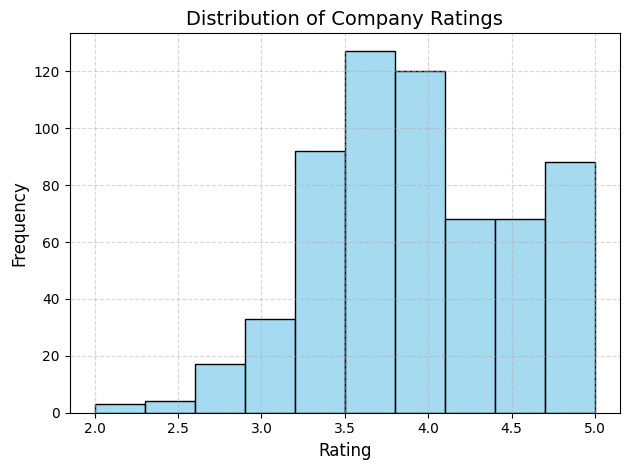

In [ ]:
# Rating Distribution
sns.histplot(data=df2, x='rating', bins=10, kde=False, color='skyblue', edgecolor='black')

plt.title('Distribution of Company Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


We visualise how company ratings relate to average offered salaries using a scatter plot

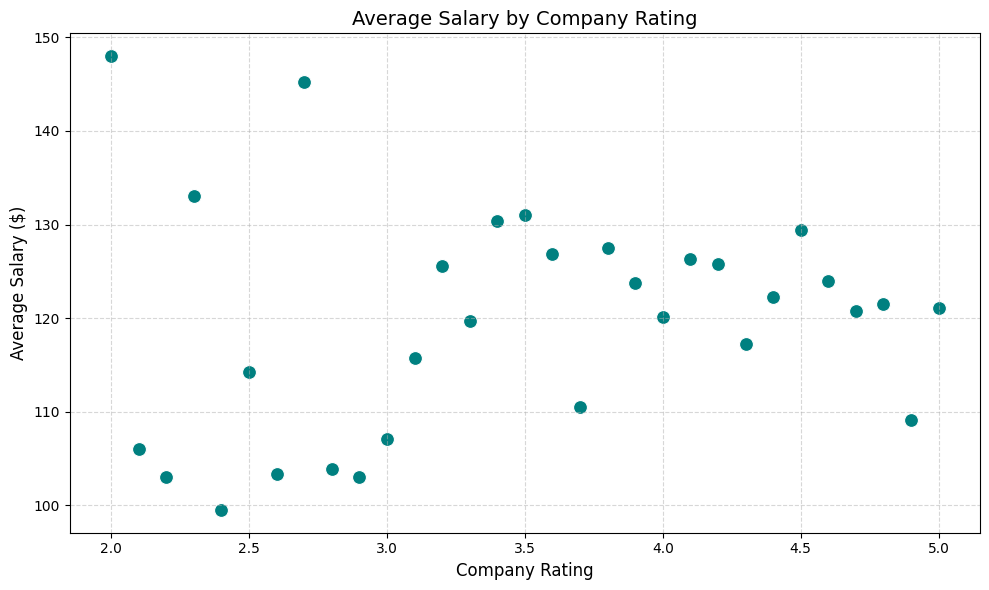

In [ ]:
# Group and compute average salary by rating
avg_salary_by_rating = df2.groupby('rating')['avg_salary'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_salary_by_rating, x='rating', y='avg_salary', color='teal', s=100)

# Beautify
plt.title('Average Salary by Company Rating', fontsize=14)
plt.xlabel('Company Rating', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

This section explores salary distribution across different job titles by visualising the minimum, average, and maximum salaries for each role.

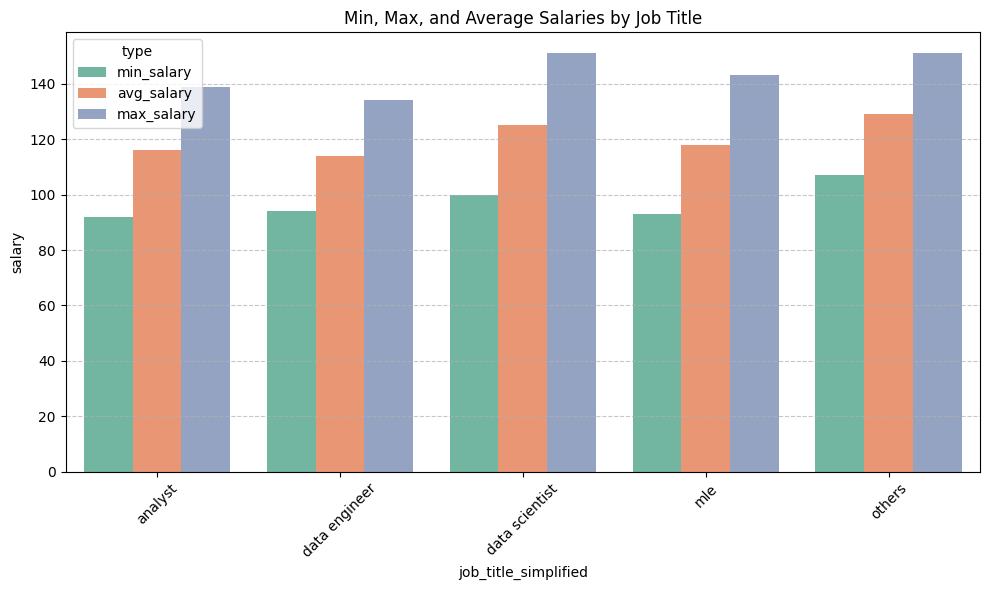

In [ ]:
# Explore Salary Range based on Job Title
# Prepare the data
salary = df2.groupby('job_title_simplified')[['min_salary', 'avg_salary', 'max_salary']].mean().round().reset_index()
salary = salary.melt(id_vars='job_title_simplified', var_name='type', value_name='salary')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=salary, x='job_title_simplified', y='salary', hue='type', palette='Set2')

plt.title('Min, Max, and Average Salaries by Job Title')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # horizontal dashed lines
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 <span style="color:red"> Try Me: Modify the code to explore salary differences based on job seniority level instead of job title. </span>

Identify the most in-demand skills by analyzing how frequently each skill appears across job descriptions.

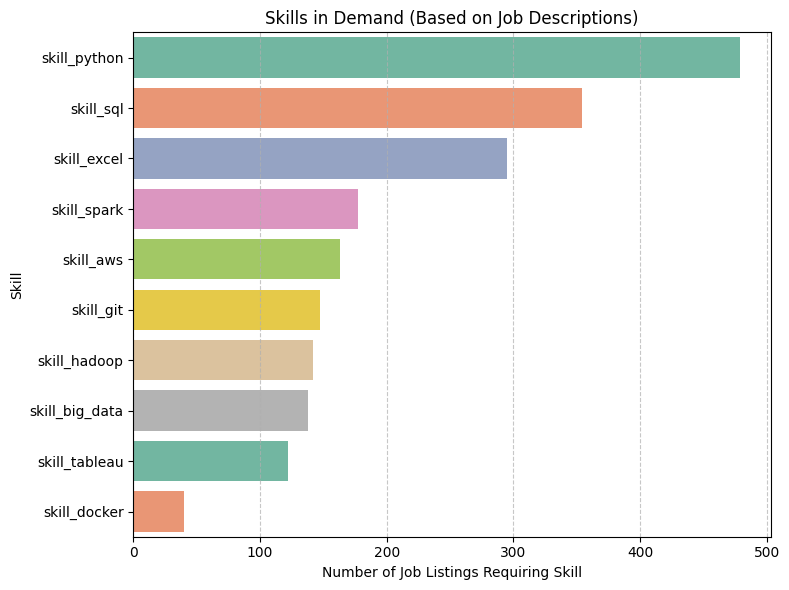

In [ ]:
# Explore skills on demand
# Select skill columns
skill_cols = [col for col in df2.columns if col.startswith('skill_')]

# Sum the skill occurrences
skill_counts = df2[skill_cols].sum().sort_values(ascending=False)  # descending for horizontal plot

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, hue=skill_counts.index, dodge=False, palette='Set2', legend=False)


plt.title('Skills in Demand (Based on Job Descriptions)')
plt.xlabel('Number of Job Listings Requiring Skill')
plt.ylabel('Skill')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Save Clean Dataset

In [ ]:
df2.to_csv("DSA3101_Cleaned_DS_jobs1.csv", index=False)

# References

* [Beginner’s guide to Numpy](https://numpy.org/doc/1.26/user/absolute_beginners.html): This is from the official numpy documentation website.
* [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html): This is a quickstart to pandas, from the official website. You can find more tutorials on this page too.
* [Python HOWTOs](https://docs.python.org/3/howto/index.html)